In [43]:
%pip install --upgrade pip 

Note: you may need to restart the kernel to use updated packages.


In [44]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


# Importing the Libraries and Packages need to the Projects 

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

## 1-  Loading the Data of A51 

In [46]:
%store -r dfarima

In [47]:
dfarima.head()

,Sum
Time,
2022-01-01,19996
2022-01-02,37186
2022-01-03,28235
2022-01-04,34317
2022-01-06,36647


In [48]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    
    df['dayofweek'] = df.index.dayofweek
    #df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

dfarima = create_features(dfarima)
dfarima.head()

,Sum,dayofweek,month,dayofyear,dayofmonth,weekofyear
Time,,,,,,
2022-01-01,19996,5,1,1,1,52
2022-01-02,37186,6,1,2,2,52
2022-01-03,28235,0,1,3,3,1
2022-01-04,34317,1,1,4,4,1
2022-01-06,36647,3,1,6,6,1


## Time Series Components
### A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.

Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

#### These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.







**Source** https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [49]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(dfarima ['Sum'])

1. ADF :  -1.909089343530207
2. P-Value :  0.3277973523824642
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 282
5. Critical Values :
	 1% :  -3.4537536300652
	 5% :  -2.8718443180148836
	 10% :  -2.572260641818822


In [50]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(dfarima.Sum.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.909089
p-value: 0.327797


Since **p-value(0.327797)** is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

In [52]:
# dfarima.set_index('Time', inplace=True)

In [53]:
dfarima.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-12', '2022-01-13',
               ...
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Time', length=292, freq=None)

AttributeError: 'DataFrame' object has no attribute 'Time'

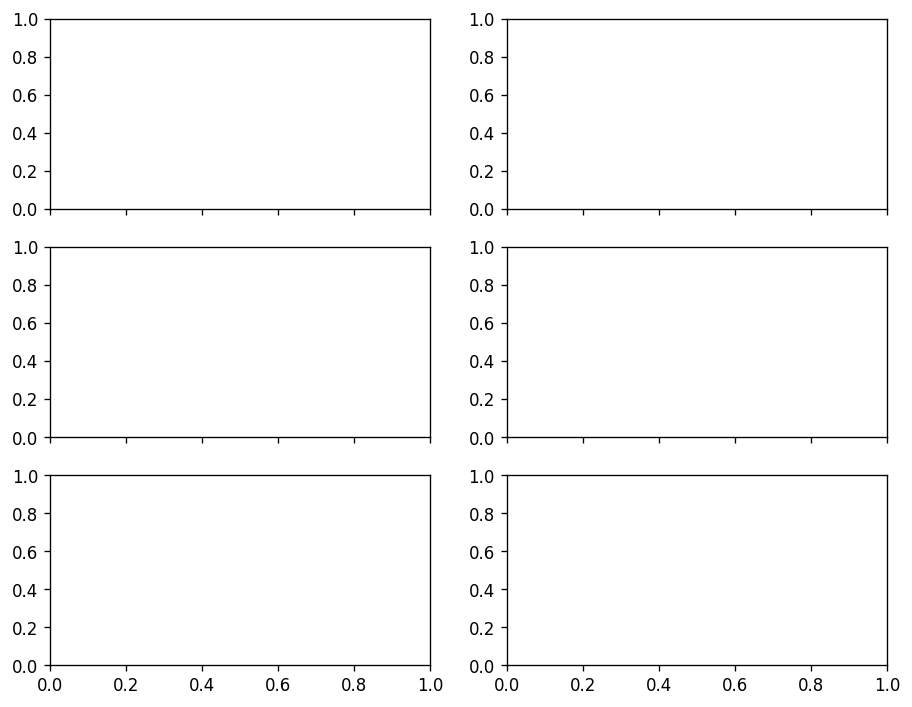

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dfarima.Time); axes[0, 0].set_title('Original Series')
plot_acf(dfarima.Time, ax=axes[0, 1])

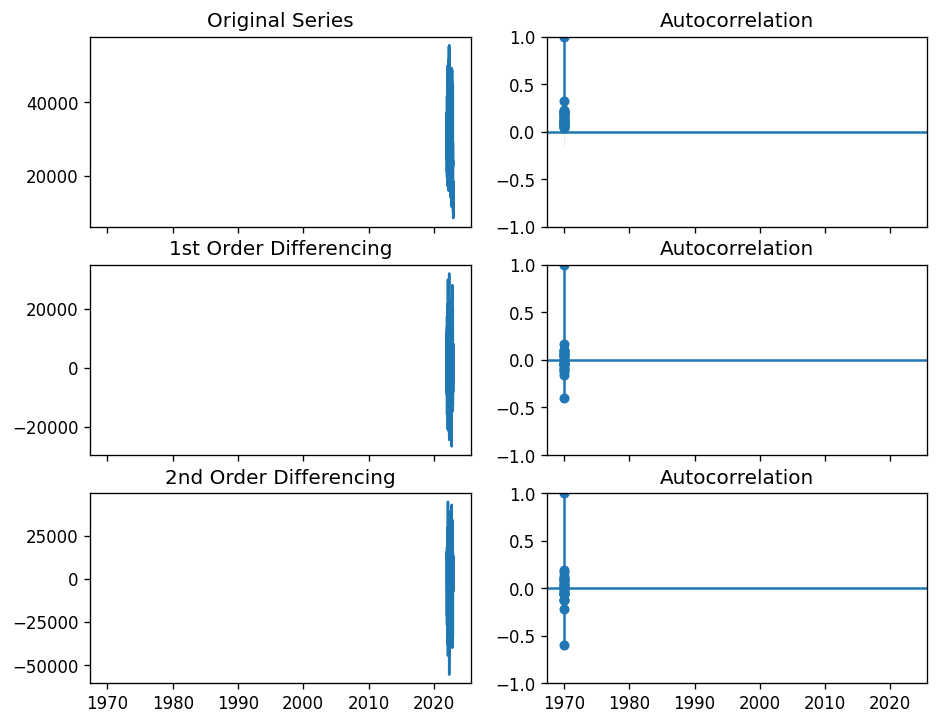

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dfarima['Sum']); axes[0, 0].set_title('Original Series')
plot_acf(dfarima['Sum'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dfarima['Sum'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dfarima['Sum'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dfarima['Sum'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dfarima['Sum'].diff().diff().dropna(), ax=axes[2, 1])

plt.show() 


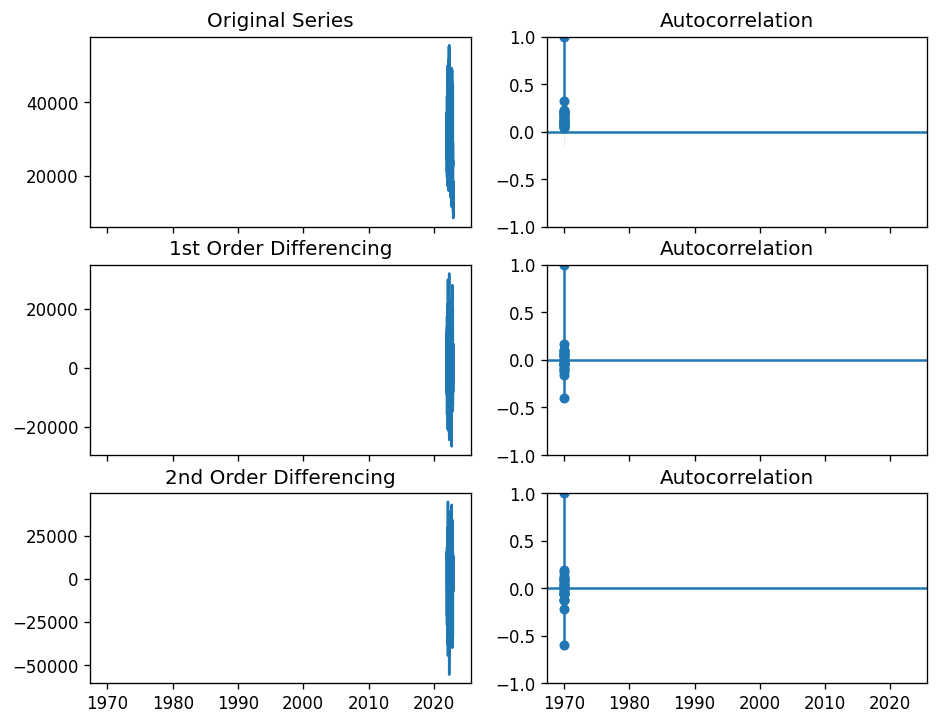

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dfarima.index, dfarima['Sum']); axes[0, 0].set_title('Original Series')
plot_acf(dfarima['Sum'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dfarima.index, dfarima['Sum'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dfarima['Sum'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dfarima.index, dfarima['Sum'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dfarima['Sum'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


In [57]:
dfarima.describe

<bound method NDFrame.describe of               Sum  dayofweek  month  dayofyear  dayofmonth  weekofyear
Time                                                                  
2022-01-01  19996          5      1          1           1          52
2022-01-02  37186          6      1          2           2          52
2022-01-03  28235          0      1          3           3           1
2022-01-04  34317          1      1          4           4           1
2022-01-06  36647          3      1          6           6           1
...           ...        ...    ...        ...         ...         ...
2022-12-25   9034          6     12        359          25          51
2022-12-26   8540          0     12        360          26          52
2022-12-29  16638          3     12        363          29          52
2022-12-30  17586          4     12        364          30          52
2022-12-31  13892          5     12        365          31          52

[292 rows x 6 columns]>

In [58]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(dfarima['Sum'], model='additive', period=12)
 # here i assuume the model is 
                                                #Additivie Model that mean the time series is consis of adding 
                                                #y(t) = Level + Trend + Seasonality + Noise



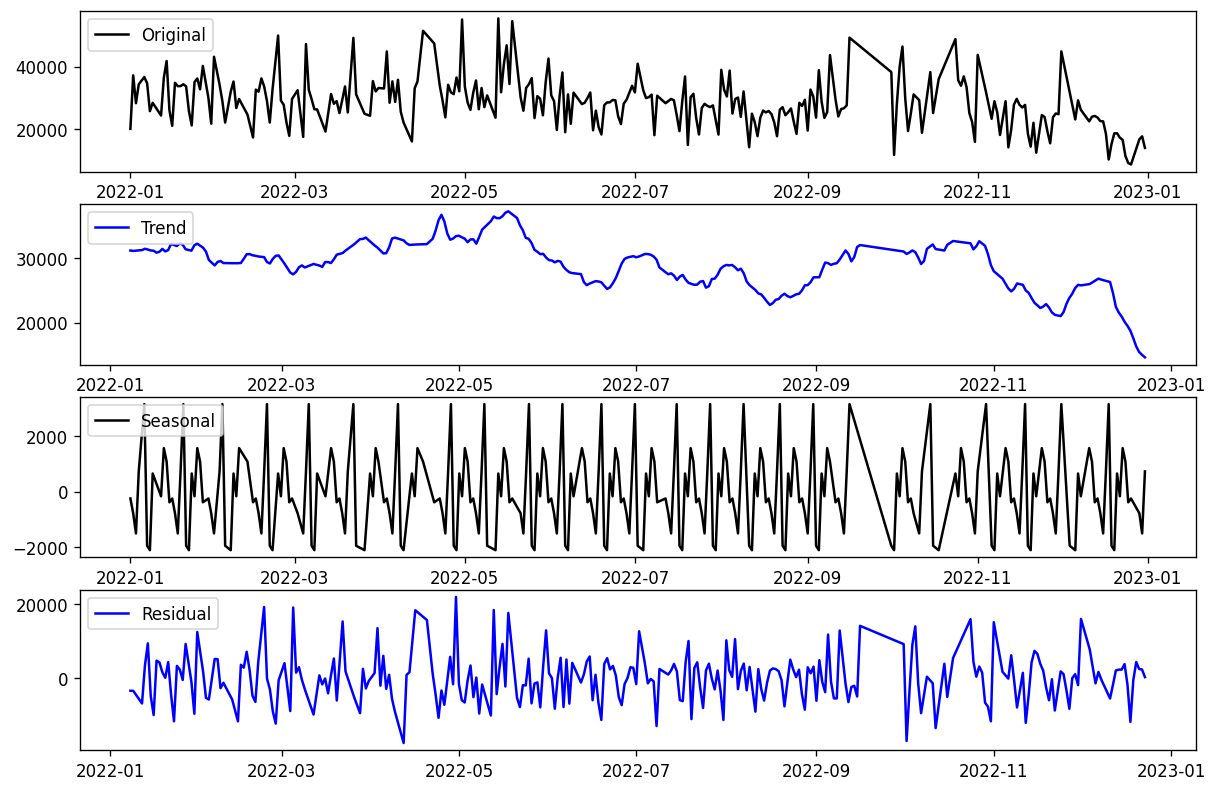

In [59]:

trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid
observed = decomposed.observed
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dfarima['Sum'], label='Original', color='black')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='black')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')

plt.show()

In [60]:
from pmdarima import auto_arima
arima_model = auto_arima(dfarima['Sum'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6152.988, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6107.502, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6031.733, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6150.991, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6028.432, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6032.478, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6028.146, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6026.009, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6038.227, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6024.707, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6030.328, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6025.807, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=6

In [61]:
print(arima_model.summary() )

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3009.354
Date:                Fri, 24 Feb 2023   AIC                           6024.707
Time:                        13:34:38   BIC                           6035.727
Sample:                             0   HQIC                          6029.122
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7430      0.063    -11.743      0.000      -0.867      -0.619
ma.L2         -0.1551      0.063     -2.466      0.014      -0.278      -0.032
sigma2      5.753e+07   1.35e-10   4.27e+17      0.0

In [62]:
dfarima['Time'] = dfarima.index

In [63]:
dfarima.head()

,Sum,dayofweek,month,dayofyear,dayofmonth,weekofyear,Time
Time,,,,,,,
2022-01-01,19996,5,1,1,1,52,2022-01-01
2022-01-02,37186,6,1,2,2,52,2022-01-02
2022-01-03,28235,0,1,3,3,1,2022-01-03
2022-01-04,34317,1,1,4,4,1,2022-01-04
2022-01-06,36647,3,1,6,6,1,2022-01-06


In [64]:
# Train test split
df_train = dfarima[dfarima['Time']<='2022-11-30']
df_test = dfarima[dfarima['Time']>'2022-11-30']

# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(df_train), 'records, ranging from', df_train['Time'].min(), 'to', df_train['Time'].max())
print('The testing dataset has', len(df_test), 'records, ranging from', df_test['Time'].min(), 'to', df_test['Time'].max())


The training dataset has 268 records, ranging from 2022-01-01 00:00:00 to 2022-11-30 00:00:00
The testing dataset has 24 records, ranging from 2022-12-01 00:00:00 to 2022-12-31 00:00:00


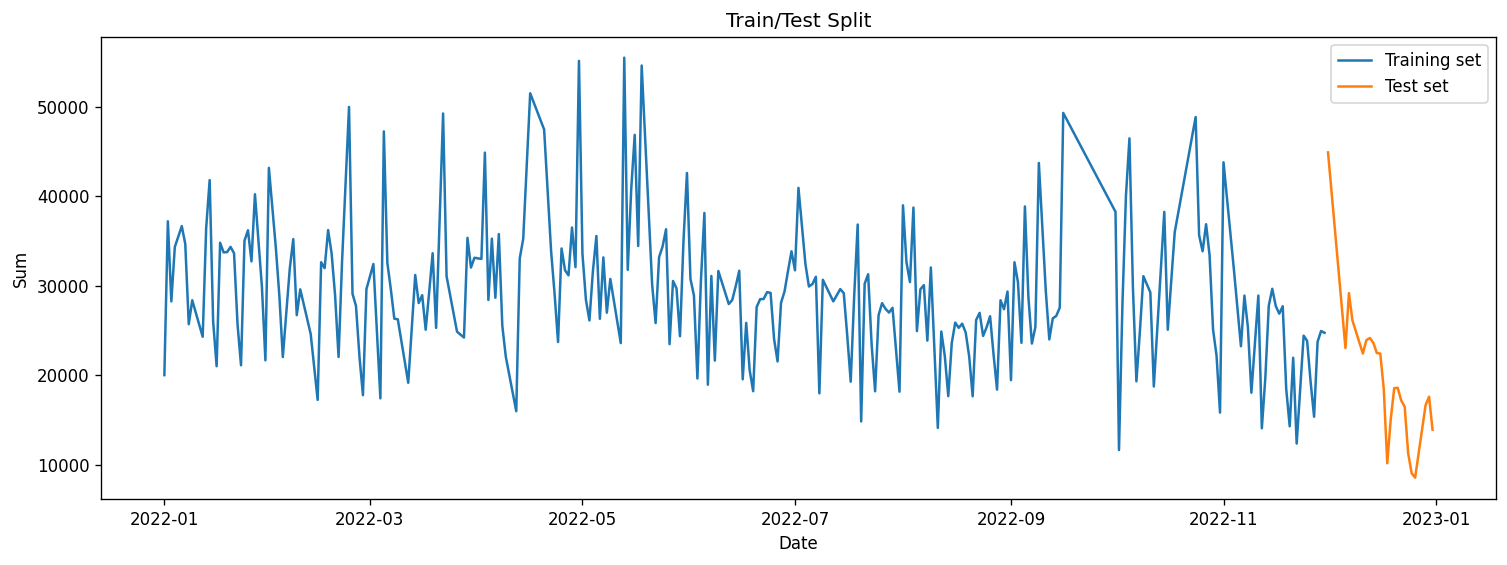

In [65]:
plt.figure(figsize=(15,5))
plt.plot(df_train['Time'], df_train['Sum'], label='Training set')
plt.plot(df_test['Time'], df_test['Sum'], label='Test set')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.legend()
plt.show()

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(df_train['Sum'],  
                order = (0, 1, 2),  
                seasonal_order =(0, 0, 0, 0)) 
  

c:\Users\engin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\engin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Sum   No. Observations:                  268
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2763.362
Date:                Fri, 24 Feb 2023   AIC                           5532.724
Time:                        13:34:44   BIC                           5543.486
Sample:                             0   HQIC                          5537.047
                                - 268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7810      0.068    -11.471      0.000      -0.914      -0.648
ma.L2         -0.1418      0.067     -2.109      0.035      -0.274      -0.010
sigma2      5.918e+07   1.53e-10   3.88e+17      0.000    5.92e+07    5.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.39
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.68
Prob(H) (two-sided):                  0.60   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.51e+33. Standard errors may be unstable.
"""

# Train prediction

In [68]:
#Train prediction
start_index = 0
end_index = len(df_train)-1
train_prediction = result.predict(start_index, end_index) 

# Prediction

In [69]:
#Prediction
start_index = len(df_train)
end_index = len(dfarima)-1
prediction = result.predict(start_index, end_index).rename('Predicted Sum') 
#Rename the column

c:\Users\engin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


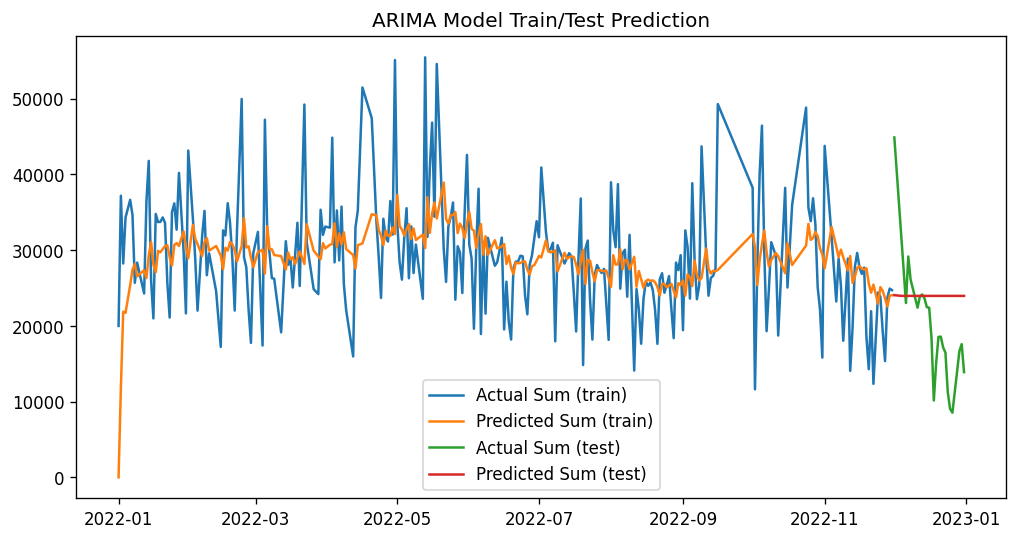

In [75]:
# Plot the train prediction and test prediction
plt.figure(figsize=(10,5))
plt.plot(df_train.index, df_train['Sum'], label='Actual Sum (train)')
plt.plot(df_train.index, train_prediction, label='Predicted Sum (train)')
plt.plot(df_test.index, df_test['Sum'], label='Actual Sum (test)')
plt.plot(df_test.index, prediction, label='Predicted Sum (test)')
plt.legend(loc='best')
plt.title('ARIMA Model Train/Test Prediction')
plt.show()

**plot predictions and actual values**

# **---------------- from Here is the old code it also be comment -----------------------------------**

In [ ]:
df = pd.read_csv("A51.csv", delimiter=";")
df.head()

## 1.2 Data Cleansing 

In [ ]:
df = df.drop(columns=["Intervall","Bezeichnung"])
# Create a boolean mask
mask = [not col.endswith('B') for col in df.columns]
# Use the mask to filter the DataFrame
df = df.filter(items=df.columns[mask])
df.head()

In [ ]:

df['Time'] = df[['Datum', 'Uhrzeit']].apply(lambda x: ' '.join(x), axis=1)
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df['Sum'] = df.iloc[:, 1:].sum(axis=1)

In [ ]:
df = df.drop(columns=["Datum","Uhrzeit"])


df.set_index('Time', inplace=True)

df.head()

Due to the Large Set of the Data for one Year with every minute 525960 Row it is very hard to do any computianal process that will noit take a lot of time So it will be more Resonable to sum all the Data that have the same hour which will give us also a lrage amount of Data 8766 Reconds but it will be more easky to deal with it  

In [ ]:
df.drop(df.columns.difference(['Time','Sum']), 1, inplace=True)

df = df.resample('H').sum()
df.head()


In [ ]:
df.describe()

In [ ]:
df.plot(y='Sum')

## Check if the DataFrame is Stationary or not 

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

In [ ]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sum'])

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    df['hours']= df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
df.head()

## Data visualization

In [ ]:
grouped_df = df.groupby("hours").mean()

# Plot the average Sum by Month
grouped_df["Sum"].plot(kind='line')

# Add labels and title
plt.xlabel('hours')
plt.ylabel('Average Sum')
plt.title('Average Sum by hours')


In [ ]:
grouped_df.plot(y="Sum", kind= 'barh')

In [ ]:
grouped_df.plot(y="Sum", kind= 'kde')

In [ ]:
df.hist(bins=20, figsize=(16,12))

In [ ]:
grouped_df = df.groupby("month").mean()

# Plot the average Sum by Month
grouped_df["Sum"].plot(kind='line')

# Add labels and title
plt.xlabel('month')
plt.ylabel('Average Sum')
plt.title('Average Sum by Month')


## Time Series Components
### A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.

Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

#### These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.







Source https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [ ]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Sum'],  
                            model ='additive') # here i assuume the model is 
                                                #Additivie Model that mean the time series is consis of adding 
                                                #y(t) = Level + Trend + Seasonality + Noise



In [ ]:

trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid
observed = decomposed.observed
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Sum'], label='Original', color='black')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='black')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')

plt.show()

## Autocorrelation function (ACF)
The autocorrelation function is a measure of the correlation between observations of a time series that are separated by k time units (yt and yt–k).

In [ ]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

from statsmodels.tsa.stattools import acf

acf_30 = acf(df.Sum, nlags=30)
plt.plot(acf_30)


In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Sum) 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the ACF
acf = plot_acf(df.Sum, lags=30, alpha=.05)

# Plot the ACF
plt.show()

## using ARMIA ALGo

In [ ]:
%pip install pmdarima

In [ ]:
df.head()

In [ ]:
from pmdarima import auto_arima
arima_model = auto_arima(df['Sum'], trace=True,
suppress_warnings=True)

## Fit best ARIMA model to univariate time series


In [ ]:
size = int(len(df) * 0.66)
X_train, X_test = df[0:size], df[size:len(df)]

<!-- from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X_train['Sum'],  
                order = (3, 0, 2),  
                seasonal_order =(0, 0, 0, 0)) # A51 --> 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X_train['Sum'],  
                order = (3, 0, 2),  
                seasonal_order =(0, 0, 0, 0)) 

In [ ]:
result = model.fit() 
result.summary() 


In [ ]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 


In [ ]:
#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index)
# prediction = result.predict(start_index, end_index).rename('Predicted Sum') 



In [ ]:
# plot predictions and actual values 

X_test['Sum'].plot(legend = True) 
prediction.plot(legend = True) 